# 3D rekonstrukcija - Primer 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lib.pg2d as pg2

## Tačke

### Vidljive tačke

In [2]:
x1 = np.array([958, 38, 1])
y1 = np.array([933, 33, 1])

x2 = np.array([1117, 111, 1])
y2 = np.array([1027, 132, 1])

x3 = np.array([874, 285, 1])
y3 = np.array([692, 223, 1])

x4 = np.array([707, 218, 1])
y4 = np.array([595, 123, 1])

x6 = np.array([1094, 536, 1])
y6 = np.array([980, 535, 1])

x7 = np.array([862, 729, 1])
y7 = np.array([652, 638, 1])

x8 = np.array([710, 648, 1])
y8 = np.array([567, 532, 1])

x9 = np.array([292, 569, 1])
y9 = np.array([272, 360, 1])

x10 = np.array([770, 969, 1])
y10 = np.array([432, 814, 1])

x11 = np.array([770, 1465, 1])
y11 = np.array([414, 1284, 1])

x12 = np.array([317, 1057, 1])
y12 = np.array([258, 818, 1])

y13 = np.array([1077, 269, 1])

x14 = np.array([1487, 598, 1])
y14 = np.array([1303, 700, 1])

x15 = np.array([1462, 1079, 1])
y15 = np.array([1257, 1165, 1])

Xs = [x1, x2, x3, x4, x9, x10, x11, x12]
Ys = [y1, y2, y3, y4, y9, y10, y11, y12]

### Nevidljive tačke

In [3]:
def cross(a, b):

    c1 = int(a[1]) * int(b[2]) - int(a[2]) * int(b[1])
    c2 = int(a[2]) * int(b[0]) - int(a[0]) * int(b[2]) 
    c3 = int(a[0]) * int(b[1]) - int(a[1]) * int(b[0])

    return [c1,c2,c3]

def invisible_point(L1, L2, L3, L4, X1, X2):

    cross_product = np.array(cross(
        cross (
            cross(cross(L1[0], L1[1]), cross(L2[0], L2[1])), X1
        ),
        cross (
            cross(cross(L3[0], L3[1]), cross(L4[0], L4[1])), X2
        )
    ))
    
    cross_product = cross_product / cross_product[-1]

    return cross_product


In [4]:
x5 = invisible_point((x4, x8), (x6, x2), (x1, x4), (x3, x2), x1, x8)
y5 = invisible_point((y4, y8), (y6, y2), (y1, y4), (y3, y2), y1, y8)

x13 = invisible_point((x9, x10), (x11, x12), (x11, x15), (x10, x14), x14, x9)

x16 = invisible_point((x10, x14), (x11, x15), (x9, x10), (x11, x12), x12, x15)
y16 = invisible_point((y10, y14), (y11, y15), (y9, y10), (y11, y12), y12, y15)

## Formiranje fundamentalne matrice

In [5]:
A = None
for ((a1, a2, a3), (b1, b2, b3)) in zip(Xs, Ys):
    a = np.array(
            [a1 * b1 , a2 * b1 , a3 * b1, a1 * b2 , a2 * b2 , a3 * b2 , a1 * b3 , a2 * b3 , a3 * b3]
        )
    
    if A is None:
        A = a   
    else:
        A = np.vstack((A, a))

print(A)

[[ 893814   35454     933   31614    1254      33     958      38       1]
 [1147159  113997    1027  147444   14652     132    1117     111       1]
 [ 604808  197220     692  194902   63555     223     874     285       1]
 [ 420665  129710     595   86961   26814     123     707     218       1]
 [  79424  154768     272  105120  204840     360     292     569       1]
 [ 332640  418608     432  626780  788766     814     770     969       1]
 [ 318780  606510     414  988680 1881060    1284     770    1465       1]
 [  81786  272706     258  259306  864626     818     317    1057       1]]


In [6]:
F = np.linalg.svd(A)[2][-1].reshape((3,3))
print("Fundamentalna matrice F:\n", F)

Fundamentalna matrice F:
 [[ 4.54020258e-07 -7.42529108e-07 -1.86611244e-03]
 [-1.99099442e-07  2.11775653e-07  2.77795603e-03]
 [ 3.96239362e-04 -2.72717967e-03  9.99990603e-01]]


## Testiranje osobina fundamentalne matrice

In [7]:
print(np.array(list(map(
    lambda P : P[1] @ F @ P[0],
    zip(Xs, Ys)
))))

[-1.11022302e-16 -6.68354261e-14 -2.58681965e-14 -4.06896739e-14
  2.22044605e-16  8.79296636e-14  1.93178806e-13  5.41788836e-14]


***Dobijamo nula vektor (sa numeričkom greškom)***

In [8]:
np.linalg.det(F)

1.7139674179615445e-12

***Determinanta je takođe 0 (uz numeričku grešku)***

## Nalaženje epipolova

In [9]:
e1 = np.linalg.svd(F)[2][-1]
e1 = e1/e1[2]
print("Epipol e1:\n", e1)

Epipol e1:
 [1.04078394e+04 1.87885919e+03 1.00000000e+00]


In [10]:
e2 = np.transpose(np.linalg.svd(F)[0])[-1]
e2 = e2 / e2[2]
print("Epipol e2:\n", e2)

Epipol e2:
 [-4.38831707e+03 -3.30785789e+03  1.00000000e+00]


## Ispravljanje preciznosti fundamentalne matrice

In [11]:
U , D, Vt = np.linalg.svd(F)
D1 = np.diag([1,1,0]) @ np.diag(D)

F1 = U @ D1 @ Vt

print("Modifikovana fundamentalna matrica F1:\n", F1)

Modifikovana fundamentalna matrica F1:
 [[ 3.17782475e-07 -7.67123224e-07 -1.86611245e-03]
 [-3.01793759e-07  1.93236919e-07  2.77795602e-03]
 [ 3.96239393e-04 -2.72717967e-03  9.99990603e-01]]


In [12]:
np.linalg.det(F1)

4.855996621219097e-28

***Za determinantu smo ponovo dobili nulu ali sa manjom numeričkom greškom.***

## Rekonstrukcija skrivenih tačaka

In [13]:
T1 = np.transpose(np.vstack((np.eye(3), np.zeros(3))))
print("Matrica prve kamere:\n", T1)

Matrica prve kamere:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


In [14]:
E2 = np.array([
    [0, -e2[2], e2[1]],
    [e2[2], 0, -e2[0]],
    [-e2[1], e2[0], 0]
])

T2 = np.transpose(np.vstack((np.transpose(E2 @ F1), e2)))
print("Matrica druge kamere:\n", T2)

Matrica druge kamere:
 [[-1.31070330e+00  9.02112258e+00 -3.30782958e+03 -4.38831707e+03]
 [ 1.73882441e+00 -1.19677298e+01  4.38827396e+03 -3.30785789e+03]
 [ 2.37554597e-03 -3.38551948e-03 -1.83633866e+01  1.00000000e+00]]


In [15]:
def jednacina(X, Y, T1, T2):
    return np.array(
        [ X[1] * T1[2] - X[2] * T1[1], 
          -X[0] * T1[2] + X[2] * T1[0],
          Y[1] * T2[2] - Y[2] * T2[1],
          -Y[0] * T2[2] + Y[2] * T2[0]
        ]
    )

In [16]:
image1 = [x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16]
image2 = [y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12, y13, y14, y15, y16]

points = np.array( list ( map ( lambda P : P[:-1], # Uklanjamo pretvaramo u afine koordinate

    map ( lambda P : P / P[-1], # Svodimo na kanonski oblik

        map ( lambda P : np.linalg.svd(jednacina(P[0], P[1], T1, T2))[2][-1], # Racunamo tacku
            zip(image1, image2)
        )
    )
)))

print("Tacke u prostoru:\n", points)


Tacke u prostoru:
 [[4.91843530e+02 1.59313908e+00 5.09016470e-01]
 [5.04614316e+02 2.83555175e+01 4.47171241e-01]
 [4.62901701e+02 1.32736814e+02 5.25575362e-01]
 [4.51538241e+02 1.24865100e+02 6.34769216e-01]
 [3.83891904e+02 1.28751447e+02 3.86994704e-01]
 [4.02597956e+02 1.34081479e+02 3.52730610e-01]
 [3.41967744e+02 2.38664138e+02 3.85483291e-01]
 [3.18681226e+02 2.46478590e+02 4.37378816e-01]
 [2.04982319e+02 3.90574979e+02 6.98659210e-01]
 [2.99381985e+02 3.56356779e+02 3.85907327e-01]
 [2.18131111e+02 3.92907417e+02 2.81440333e-01]
 [1.33994812e+02 4.34968096e+02 4.20089046e-01]
 [4.03656240e+02 4.66525599e+01 3.90891784e-01]
 [4.58570726e+02 1.19093832e+02 2.96527638e-01]
 [3.86631275e+02 1.84150621e+02 2.46041404e-01]
 [3.35122954e+02 1.40205833e+02 3.05634378e-01]]


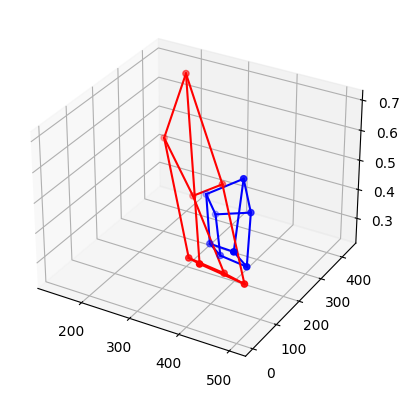

In [17]:
box1 = np.array([points[8], points[9], points[10], points[11], points[12], points[13], points[14], points[15]])
box2 = np.array([points[0], points[1], points[2], points[3], points[4], points[5], points[6], points[7]])

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(box1[:,0], box1[:,1], box1[:,2], color='red')
ax.scatter(box2[:,0], box2[:,1], box2[:,2], color='blue')

edges1 = [
    (1, 2), 
    (2, 3), 
    (3, 4),
    (4, 1),
    (5, 6),    (6, 7),
    (7, 8),
    (8, 5),
    (1, 5),
    (2, 6),
    (3, 7),
    (4, 8)
]

edges2 = [
    (9, 10),
    (10, 11),
    (11, 12),
    (12, 9),
    (13, 14),
    (14, 15),
    (15, 16),
    (16, 13),
    (9, 13),
    (10, 14),
    (11, 15),
    (12, 16)
]

# Box1
for (p1, p2) in edges1:
    p1 -= 1
    p2 -= 1
    ax.plot(
        [points[p1][0], points[p2][0]],
        [points[p1][1], points[p2][1]],
        [points[p1][2], points[p2][2]],
        color='blue'
    )


# Box2
for (p1, p2) in edges2:
    p1 -= 1
    p2 -= 1
    ax.plot(
        [points[p1][0], points[p2][0]],
        [points[p1][1], points[p2][1]],
        [points[p1][2], points[p2][2]],
        color='red'
    )